# Analiza prometnih nesreća u SAD

# Modeliranje i priprema podataka

# Import potrebnih biblioteka 


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.distance import geodesic
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Učitavanje podataka

In [2]:
df = pd.read_csv("US_Accidents_March23.csv")
print("Dimenzije originalnog skupa:", df.shape)

Dimenzije originalnog skupa: (7728394, 46)


# Brisanje irelevantnih kolona

In [3]:
kolone_za_brisanje = [
    'ID', 'Source', 'Severity', 'End_Lat', 'End_Lng', 'Description',   
    'Street', 'Zipcode', 'Country', 'Airport_Code',
    'Temperature(F)', 'Weather_Timestamp', 'Pressure(in)', 'Precipitation(in)', 
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop',
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 
    'Astronomical_Twilight', 'Timezone'
]
df.drop(columns=kolone_za_brisanje, inplace=True)

# Odabir ključnih kolona

In [4]:
kolone_potrebne = [
    'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 
    'City', 'County', 'State', 
    'Humidity(%)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 
    'Weather_Condition'
]
df = df.dropna(subset=kolone_potrebne)

# Izdvajanje potrebnih podataka

In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

df['Lat_Group'] = pd.cut(df['Start_Lat'], bins=20, labels=False)
df['Lng_Group'] = pd.cut(df['Start_Lng'], bins=20, labels=False)


# Grupisanje po regionu i vremenu

In [6]:
agg = df.groupby(['Lat_Group', 'Lng_Group', 'Hour', 'Month', 'Weather_Condition']).size().reset_index(name='accident_count')
print("Ukupno grupa:", agg.shape[0])

Ukupno grupa: 406623


# Eksport podataka za modeliranje

In [7]:
agg.to_csv("nesrece_model_podaci.csv", index=False)
print("Podaci za modeliranje su spremljeni u 'nesrece_model_podaci.csv'")

Podaci za modeliranje su spremljeni u 'nesrece_model_podaci.csv'


# Vizualizacija nesreća po satu

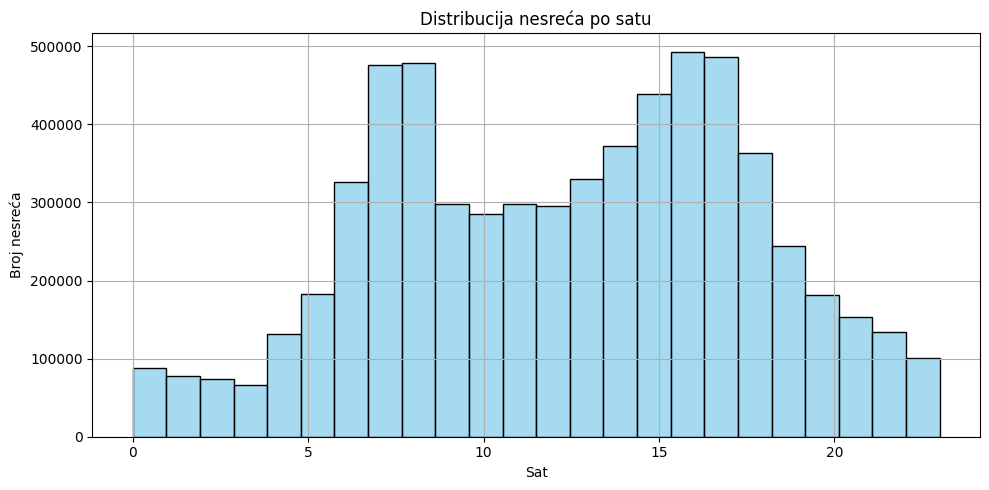

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue')
plt.title("Distribucija nesreća po satu")
plt.xlabel("Sat")
plt.ylabel("Broj nesreća")
plt.grid(True)
plt.tight_layout()

# Vizualizacija nesreća po danu

<Axes: title={'center': 'Nesreće po danu'}, xlabel='Weekday'>

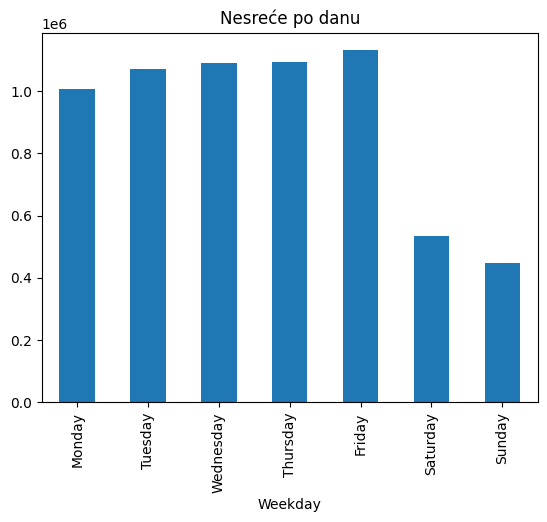

In [ ]:
df['Weekday'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot(kind='bar', title='Nesreće po danu')

# Vizualizacija nesreća po mjesecu

<Axes: title={'center': 'Nesreće po mjesecu'}, xlabel='Month'>

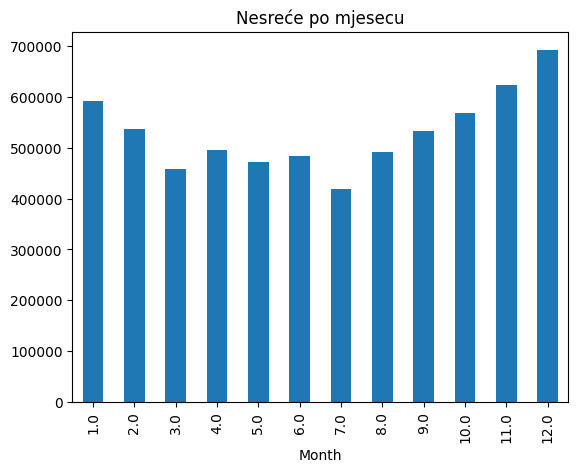

In [ ]:
df['Month'].value_counts().sort_index().plot(kind='bar', title='Nesreće po mjesecu')

# Vizualizacija po vremenskim uslovima 

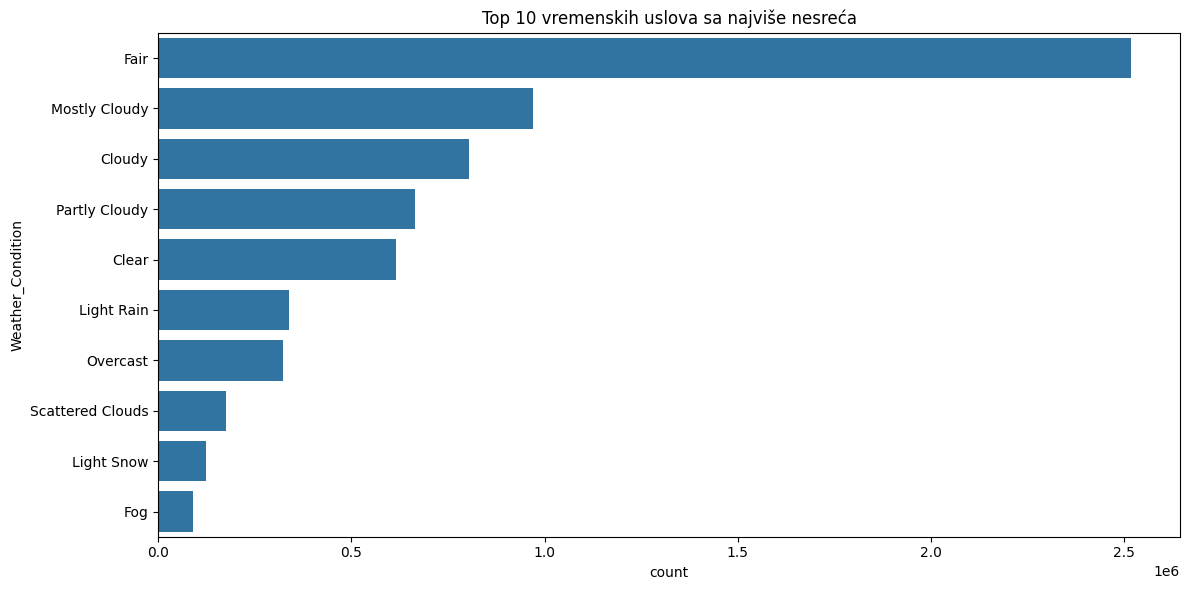

In [11]:
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
df_weather = df[df['Weather_Condition'].isin(top_weather)]
plt.figure(figsize=(12, 6))
sns.countplot(y='Weather_Condition', data=df_weather, order=top_weather)
plt.title("Top 10 vremenskih uslova sa najviše nesreća")
plt.tight_layout()

# Top 10 država po broju nesreća

<Axes: title={'center': 'Top 10 država po broju nesreća'}, xlabel='State'>

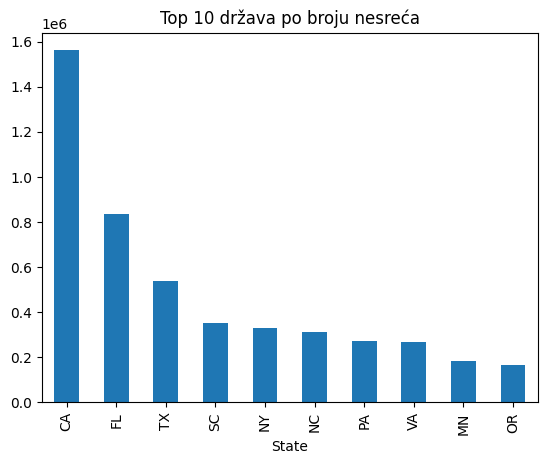

In [12]:
df['State'].value_counts().head(10).plot(kind='bar', title='Top 10 država po broju nesreća')

# Top 10 gradova po broju nesreća

<Axes: title={'center': 'Top 10 gradova po broju nesreća'}, xlabel='City'>

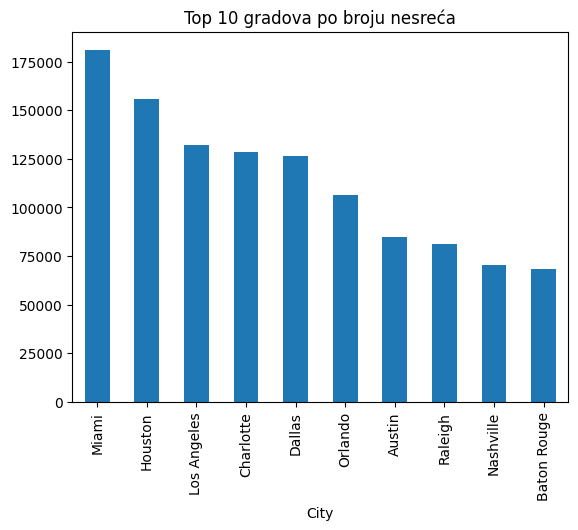

In [13]:
df['City'].value_counts().head(10).plot(kind='bar', title='Top 10 gradova po broju nesreća')

# Geografska distribucija nesreća

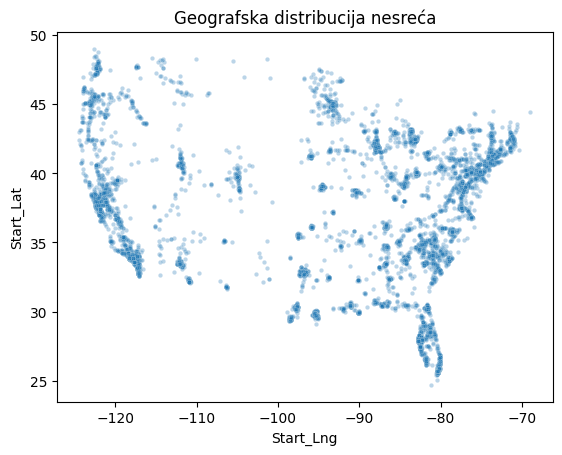

In [ ]:
sns.scatterplot(data=df.sample(10000), x='Start_Lng', y='Start_Lat', alpha=0.3, s=10)
plt.title("Geografska distribucija nesreća")
plt.show()

# Korelacijska matrica

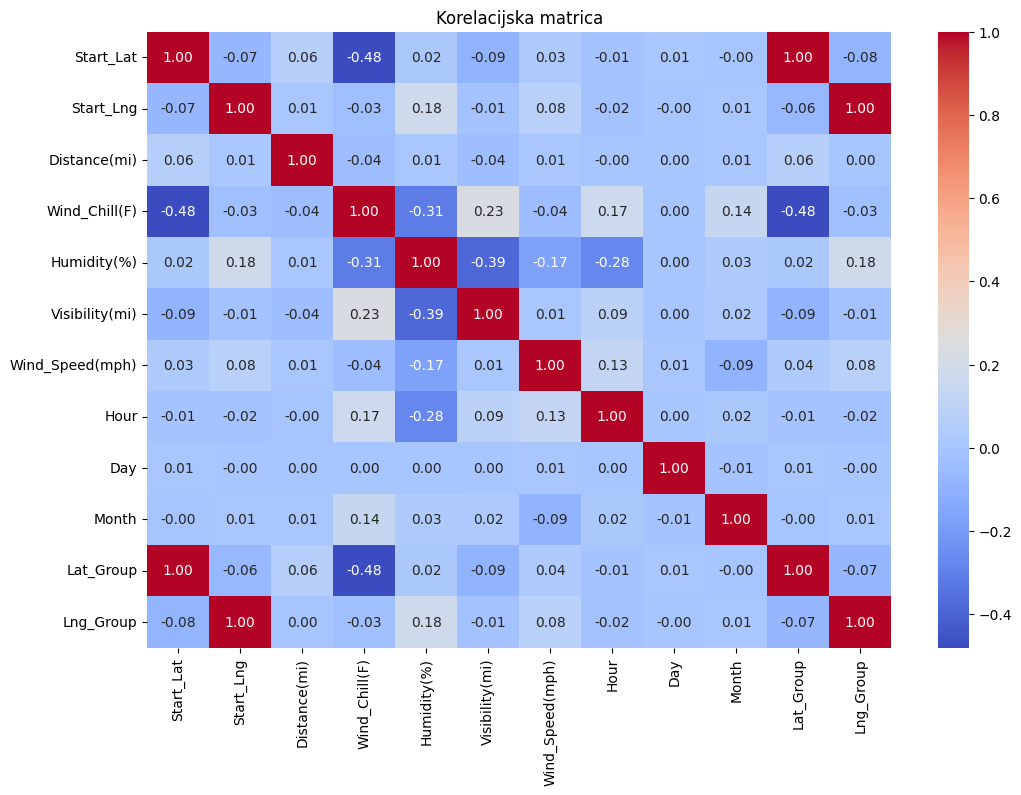

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelacijska matrica")
plt.show()